## MSDS-593: Lab 3
#### Jacek Plonowski

In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
%config InlineBcakend.figure_format='retina'

In [7]:
! ls ../notebooks/data

cars.csv	happy-2016.csv		       organdonation.csv
happy-2015.csv	kaggle-uber-other-federal.csv


In [9]:
path = "../notebooks/data/"
data = pd.read_csv(path+'cars.csv')
data.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [14]:
# Get average miles per gallon for each car with the same number of cylinders
avg_mpg = data.groupby('CYL').mean()['MPG']
avg_wgt = data.groupby('CYL').mean()['WGT'] # do the same for average weight

# Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = data.groupby('WGT').mean()['MPG']

# Get the unique list of cylinders in numerical order
cyl = sorted(data['CYL'].unique())

# Get a list of all mpg values for three specific cylinder sizes
cyl4 = data[data['CYL']==4]['MPG'].values
cyl6 = data[data['CYL']==6]['MPG'].values
cyl8 = data[data['CYL']==8]['MPG'].values

## Modifying Text

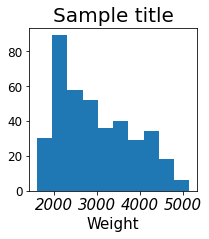

In [31]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(data['WGT'])
ax.set_xlabel('Weight', fontsize=15, fontname='Dejavu Sans')
ax.set_title('Sample title', fontsize=20, fontname='Dejavu Sans')

ax.tick_params(axis='both', labelsize=12)

for tick in ax.get_xticklabels():
    tick.set_fontname('Dejavu Sans')
    tick.set_fontsize(15)
    tick.set_style('italic')
    
plt.show()

In [25]:
ax.get_xticklabels()

[Text(1000.0, 0, '1000'),
 Text(2000.0, 0, '2000'),
 Text(3000.0, 0, '3000'),
 Text(4000.0, 0, '4000'),
 Text(5000.0, 0, '5000'),
 Text(6000.0, 0, '6000')]

## Setting Colors

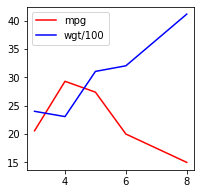

In [39]:
fig, ax = plt.subplots(figsize=(3,3)) #this plot shows overly saturated line color choices

ax.plot(cyl, avg_mpg,
        c='red',
       label='mpg')

ax.plot(cyl, avg_wgt/100,
        c='blue',
       label='wgt/100')

ax.legend()
plt.show()

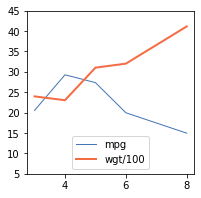

In [50]:
fig, ax = plt.subplots(figsize=(3,3))

ax.plot(cyl, avg_mpg,
        c='#4574B4',
        lw=1,
        label='mpg')

ax.plot(cyl, avg_wgt/100,
        c='#F46C43',
        lw=2,
        label='wgt/100')

ax.set_ylim(5,45)

ax.legend(loc=8)
plt.show()

## Exercise 1

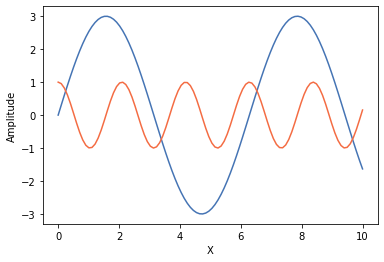

In [59]:
fig, ax = plt.subplots(figsize=(6,4))
x = np.linspace(0,10,num=100)
y1 = 3*np.sin(x)
y2 = np.cos(3*x)

ax.plot(x, y1, c='#4574B4')
ax.plot(x, y2, c='#F46C43')

ax.set_xlabel('X')
ax.set_ylabel('Amplitude')

plt.show()

## Scatterplots

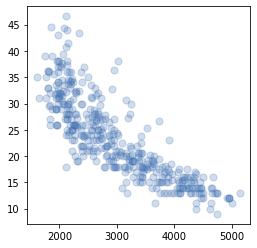

In [164]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(data['WGT'], data['MPG'],
           s=50, #size of the individual points
           c='#4574B4',
           alpha=0.25)

plt.show()

In [88]:
cmap = plt.get_cmap('coolwarm') #define colormap by specific name, get from docs
print(cmap(0))
print(cmap(1))

(0.2298057, 0.298717966, 0.753683153, 1.0)
(0.23437707945098038, 0.3055417303294118, 0.7596795275882353, 1.0)


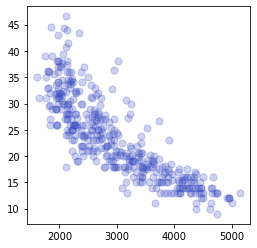

In [203]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(data['WGT'],
           data['MPG'],
           s=50, #size of the individual points
           color=(0.23437707945098038, 0.3055417303294118, 0.7596795275882353, 1.0),
           alpha=0.25)

plt.show()

In [69]:
data['MPG'].max()

46.599998

In [70]:
data['MPG'].min()

9.0

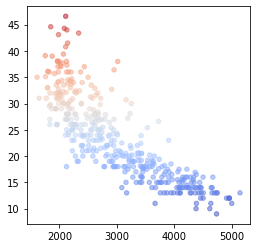

In [84]:
norm = colors.Normalize(data['MPG'].min(),data['MPG'].max())
norm_vals1 = norm(data['MPG'])
color_set1 = cmap(norm_vals)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(data['WGT'], data['MPG'],
           c=color_set1,
           s=20,
           alpha=0.5)
plt.show()

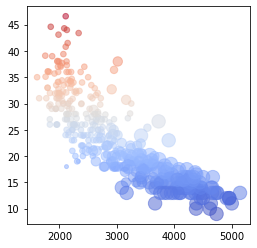

In [87]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(data['WGT'], data['MPG'],
           c=color_set1,
           s=data['CYL']**2.5, #using value for cylinder^2.5 to display another variable vs wgt/mpg
           alpha=0.5)

plt.show()

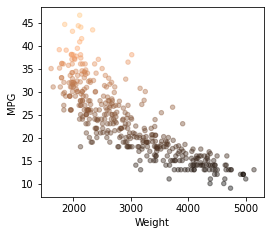

In [192]:
fig, ax = plt.subplots(figsize=(4,3.5))

cmap = plt.get_cmap('copper')
color_set2 = cmap(norm(data['MPG']))

ax.scatter(data['WGT'], data['MPG'],
           c=color_set2,
           s=20, 
           alpha=.4)

ax.set_xlabel("Weight")
ax.set_ylabel("MPG")

plt.show()

## Exercise 2:

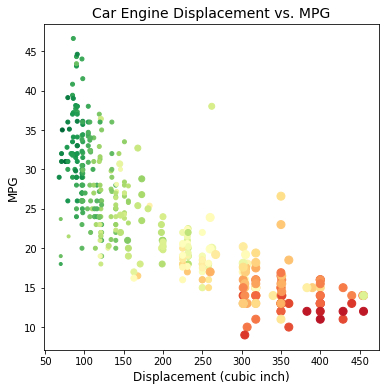

In [235]:
fig, ax = plt.subplots(figsize=(6,6))
cmap=plt.get_cmap('RdYlGn')

norm = colors.Normalize(data['WGT'].min(),data['WGT'].max())
color_set3 = cmap(1-(norm(data['WGT'])))

ax.scatter(data['ENG'], data['MPG'],
           c=color_set3,
           s=data['CYL']**2)

ax.set_xlabel('Displacement (cubic inch)', fontsize=12)
ax.set_ylabel('MPG', fontsize=12)
plt.title('Car Engine Displacement vs. MPG', fontsize=14)

plt.show()

## Histograms

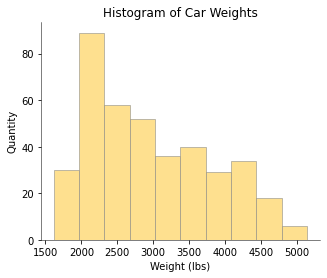

In [184]:
fig, ax = plt.subplots(figsize=(5,4))

n, bins, patches = ax.hist(data['WGT'], color='#FEE08F')

ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Quantity")
ax.set_title("Histogram of Car Weights")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5) #can save on boilerplate by writing function for formatting
    
for rect in patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

plt.show()

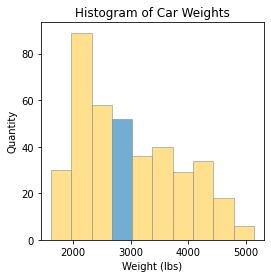

In [210]:
fig, ax = plt.subplots(figsize=(4,4))
n, bins, patches = ax.hist(data['WGT'], color='#FEE08F')

ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Quantity")
ax.set_title("Histogram of Car Weights")

for i,rect in enumerate(patches): #use enumerate to get val and index, index on that bar
    if i==3:
        rect.set_color('#73ADD2') #set individual color for that bar
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

plt.show()

## Line Plots

[]

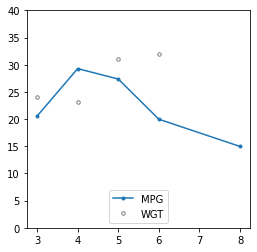

In [102]:
fig, ax = plt.subplots(figsize=(4,4))

ax.plot(cyl, avg_mpg,
        '.-', #dot and dash draws points connected by line segments between points
        label='MPG')

ax.plot(cyl, avg_wgt/100,
        '.', #just dots alone turn the marker into a different shape, refer to docs for syntax
        markersize=7,
        c='grey',
        fillstyle='none', #non-filled with increased size and changed colors
        label='WGT')

ax.set_ylim(0,40)
ax.legend(loc=8)
plt.plot()

## Exercise 3

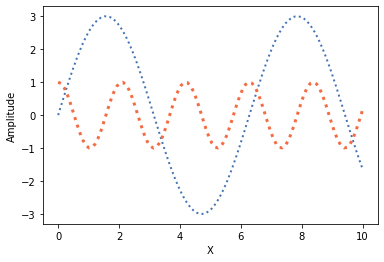

In [115]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(x, y1,
        ':',
        lw=2,
        c='#4574B4')

ax.plot(x, y2,
        ':',
        lw=3,
        c='#F46C43')

ax.set_xlabel('X')
ax.set_ylabel('Amplitude')

plt.show()

## Removing Extra Lines

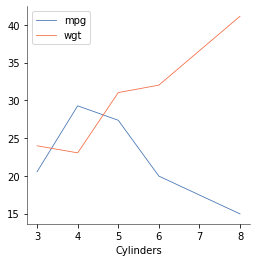

In [118]:
fig, ax = plt.subplots(figsize=(4,4))

ax.plot(cyl, avg_mpg,     lw=.8, c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, lw=.8, c='#F46C43', label="wgt")

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) #top and right-most borders of the plot are removed
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5) #thin bottom and left-most borders to not distract

ax.set_xlabel("Cylinders")
plt.legend()
plt.show()

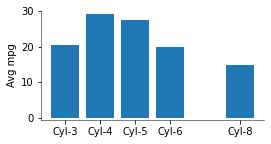

In [120]:
fig, ax = plt.subplots(figsize=(4,2))

ax.bar(cyl, avg_mpg)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Avg mpg")

ax.set_xticks(cyl)
ax.set_xticklabels([f'Cyl-{n}' for n in cyl]) #processes array of cyl integer to "Cyl-n"
ax.set_ylim(-0.5,30)

plt.show()

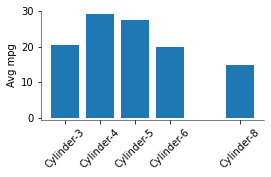

In [131]:
fig, ax = plt.subplots(figsize=(4,2))

ax.bar(cyl, avg_mpg)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Avg mpg")

ax.set_xticks(cyl)
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl],
                   rotation=45)

ax.set_ylim(-0.5,30)
plt.show()

## Bar Chart Widths

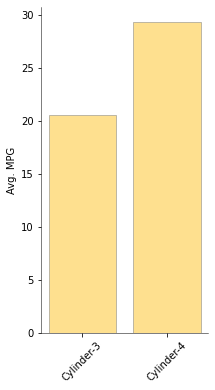

In [130]:
cyl2 = cyl[0:2]
avg_mpg_ = avg_mpg[0:2]

fig, ax = plt.subplots(figsize=(3,6)) #multiply this by a factor to retain aspect ratio, avoid whitespace issues

barcontainers = ax.bar(cyl_, avg_mpg_, color='#FEE08F')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Avg. MPG")

for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')
    
ax.set_xticks(cyl2)
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl_],
                   rotation=45)

plt.show()

## Exercise 4

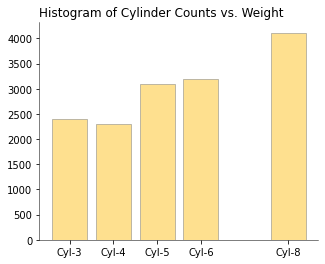

In [166]:
fig, ax = plt.subplots(figsize=(5,4))

barcontainers = ax.bar(cyl, avg_wgt,color='#FEE08F')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

for rect in barcontainers.patches:
    rect.set_linewidth(0.5)
    rect.set_edgecolor('grey')
    
ax.set_xticks(cyl)
ax.set_xticklabels([f'Cyl-{x}' for x in cyl])

plt.title('Histogram of Cylinder Counts vs. Weight', loc='left')
plt.show()

## Multi-Bar and Stacked Bar Charts

In [149]:
high = np.array([ 337, 628,   722,  636,  649,  510,  351])
med  = np.array([ 969, 1950, 2077, 1886, 1905, 1479,  942])
low  = np.array([2866, 5643, 6425, 5521, 4897, 4845, 3179])

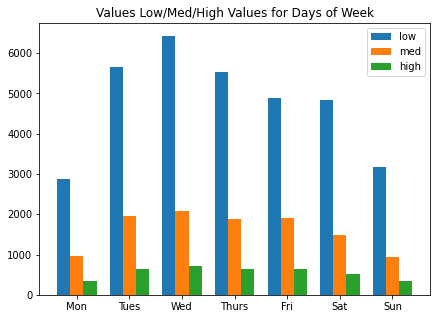

In [212]:
fig, ax = plt.subplots(figsize=(7,5))

w = 0.25

ax.bar(np.arange(7)-w, low,
       width=w,
       label='low')

ax.bar(np.arange(7), med,
       width=w,
       label='med')

ax.bar(np.arange(7)+w, high,
       width=w,
       label='high')

ax.set_xticks(range(7))
ax.set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat', 'Sun'])

plt.legend()
plt.title('Values Low/Med/High Values for Days of Week')
plt.show()